In [1]:
pip install advertools


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.5 MB/s eta 0:00:00


In [2]:
%config InlineBackend.figure_format = 'retina' # high resolution plotting
import matplotlib.pyplot as plt
import pandas as pd
import advertools as adv
import networkx as nx
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 280)
adv.__version__

'0.14.2'

In [3]:
from google.colab import files
uploaded = files.upload()

Saving justdoit_tweets_2018_09_07_2.csv to justdoit_tweets_2018_09_07_2.csv


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 280)

In [5]:
tweets_users_df = pd.read_csv('justdoit_tweets_2018_09_07_2.csv', )
print(tweets_users_df.shape)
tweets_users_df.head(3)

(5089, 72)


tweet_contributors tweet_coordinates                tweet_created_at  \
0                 NaN               NaN  Fri Sep 07 16:25:06 +0000 2018   
1                 NaN               NaN  Fri Sep 07 16:24:59 +0000 2018   
2                 NaN               NaN  Fri Sep 07 16:24:50 +0000 2018   

  tweet_display_text_range  \
0                  [0, 75]   
1                 [0, 237]   
2                 [0, 176]   

                                                                                                                                                                                                                                                                            tweet_entities  \
0  {'hashtags': [{'text': 'quote', 'indices': [47, 53]}, {'text': 'motivation', 'indices': [54, 65]}, {'text': 'justdoit', 'indices': [66, 75]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1038100853872197632, 'id_str': '1038100853872197632', 'indices': [76...   
1  {'hashtags': [{'text': 'hero', 'indices': [90, 95]}, {'text': 'fdny', 'indices': [96, 101]}, {'text': 'likesforlikes', 'indices': [102, 116]}, {'text': 'promo', 'indices': [117, 123]}, {'text': 'music', 'indices': [124, 130]}, {'text': 'instagood', 'indices': [131, 141]}, {'t...   
2  {'hashtags': [{'text': 'JustDoIt', 'indices': [127, 136]}, {'text': '4YourMorning', 'indices': [137, 150]}, {'text': '4YourMemeCollection', 'indices': [151, 171]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1038100773396041728, 'id_str': '10381007733960...   

                                                                                                                                                                                                                                                                   tweet_extended_entities  \
0  {'media': [{'id': 1038100853872197632, 'id_str': '1038100853872197632', 'indices': [76, 99], 'media_url': 'http://pbs.twimg.com/media/DmgTOfwVAAAJqoh.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DmgTOfwVAAAJqoh.jpg', 'url': 'https://t.co/J9lLdszdW6', 'display_url': '...   
1                                                                                                                                                                                                                                                                                      NaN   
2  {'media': [{'id': 1038100773396041728, 'id_str': '1038100773396041728', 'indices': [177, 200], 'media_url': 'http://pbs.twimg.com/media/DmgTJz9UUAA57tu.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DmgTJz9UUAA57tu.jpg', 'url': 'https://t.co/6ok9qR6k6M', 'display_url':...   

   tweet_favorite_count  tweet_favorited  \
0                     0            False   
1                     0            False   
2                     0            False   

                                                                                                                                                                                                                                     tweet_full_text  \
0                                                                                                                                                Done is better than perfect. — Sheryl Sandberg #quote #motivation #justdoit https://t.co/J9lLdszdW6   
1  Shout out to the Great Fire Department and the tour! 👨‍🚒👨‍🚒 Much love to NYC! 💯🎥🔥✊🏿\n•\n•\n•\n#hero #fdny #likesforlikes #promo #music #instagood #instadaily #postoftheday #bestoftheday #justdoit #nike #picoftheday... https://t.co/sFobQ2ukpo   
2                                       There are some AMAZINGLY hilarious Nike Ad memes happening on my newsfeed.  Soooo, I decided to get a little creative too... \n\n#JustDoIt #4YourMorning #4YourMemeCollection \n\n🍪😂 https://t.co/6ok9qR6k6M   

  tweet_geo             tweet_id         tweet_id_str  \
0       NaN  1038100857932394496  1038100857932394496   
1      

In [6]:
[x for x in dir(adv) if x.startswith('extract')]  # currently available extract functions

['extract',
 'extract_currency',
 'extract_emoji',
 'extract_exclamations',
 'extract_hashtags',
 'extract_intense_words',
 'extract_mentions',
 'extract_numbers',
 'extract_questions',
 'extract_urls',
 'extract_words']

In [7]:
hashtag_summary = adv.extract_hashtags(tweets_users_df['tweet_full_text'])
hashtag_summary.keys()

dict_keys(['hashtags', 'hashtags_flat', 'hashtag_counts', 'hashtag_freq', 'top_hashtags', 'overview'])

In [8]:
hashtag_summary['overview']

{'num_posts': 5089,
 'num_hashtags': 15483,
 'hashtags_per_post': 3.0424444881116135,
 'unique_hashtags': 4630}

Next, we can explore the extracted hashtags themselves. Here we are looking at the first ten.   
As you can see for each post we get a list of hashtags. We get an empty list wherever there are no hashtags in the tweet.

In [9]:
hashtag_summary['hashtags'][:10]

[['#quote', '#motivation', '#justdoit'],
 ['#hero',
  '#fdny',
  '#likesforlikes',
  '#promo',
  '#music',
  '#instagood',
  '#instadaily',
  '#postoftheday',
  '#bestoftheday',
  '#justdoit',
  '#nike',
  '#picoftheday'],
 ['#justdoit', '#4yourmorning', '#4yourmemecollection'],
 ['#kapernickeffect', '#swoosh', '#justdoit'],
 ['#shaquem',
  '#nfl',
  '#seattle',
  '#seahawks',
  '#griffin',
  '#justdoit',
  '#nike'],
 ['#justdoit'],
 ['#registertovote', '#justdoit'],
 ['#justdoit'],
 ['#justdoit', '#takeaknee', '#takeakneeinnikes'],
 ['#fx',
  '#feelgoodfriday',
  '#fridayfeeling',
  '#tradermoni',
  '#justdoit',
  '#fridaymotivation']]

In [10]:
hashtag_summary['hashtags_flat'][:10]

['#quote',
 '#motivation',
 '#justdoit',
 '#hero',
 '#fdny',
 '#likesforlikes',
 '#promo',
 '#music',
 '#instagood',
 '#instadaily']

The count of hashtags for each tweet is given by the `hashtag_counts` key.   
Later, we will combine all these in one DataFrame and do further analysis on them.

In [11]:
hashtag_summary['hashtag_counts'][:20]

[3, 12, 3, 3, 7, 1, 2, 1, 3, 6, 1, 2, 1, 1, 2, 1, 7, 1, 3, 2]

In [12]:
hashtag_summary['hashtag_freq'][:15]

[(1, 2058),
 (2, 1061),
 (3, 686),
 (4, 374),
 (5, 239),
 (6, 154),
 (7, 94),
 (8, 74),
 (9, 60),
 (10, 65),
 (11, 58),
 (12, 39),
 (13, 25),
 (14, 24),
 (15, 11)]

Visualizing the frequencies to get a better overview of how they are distributed, we plot the top fifteen frequencies:

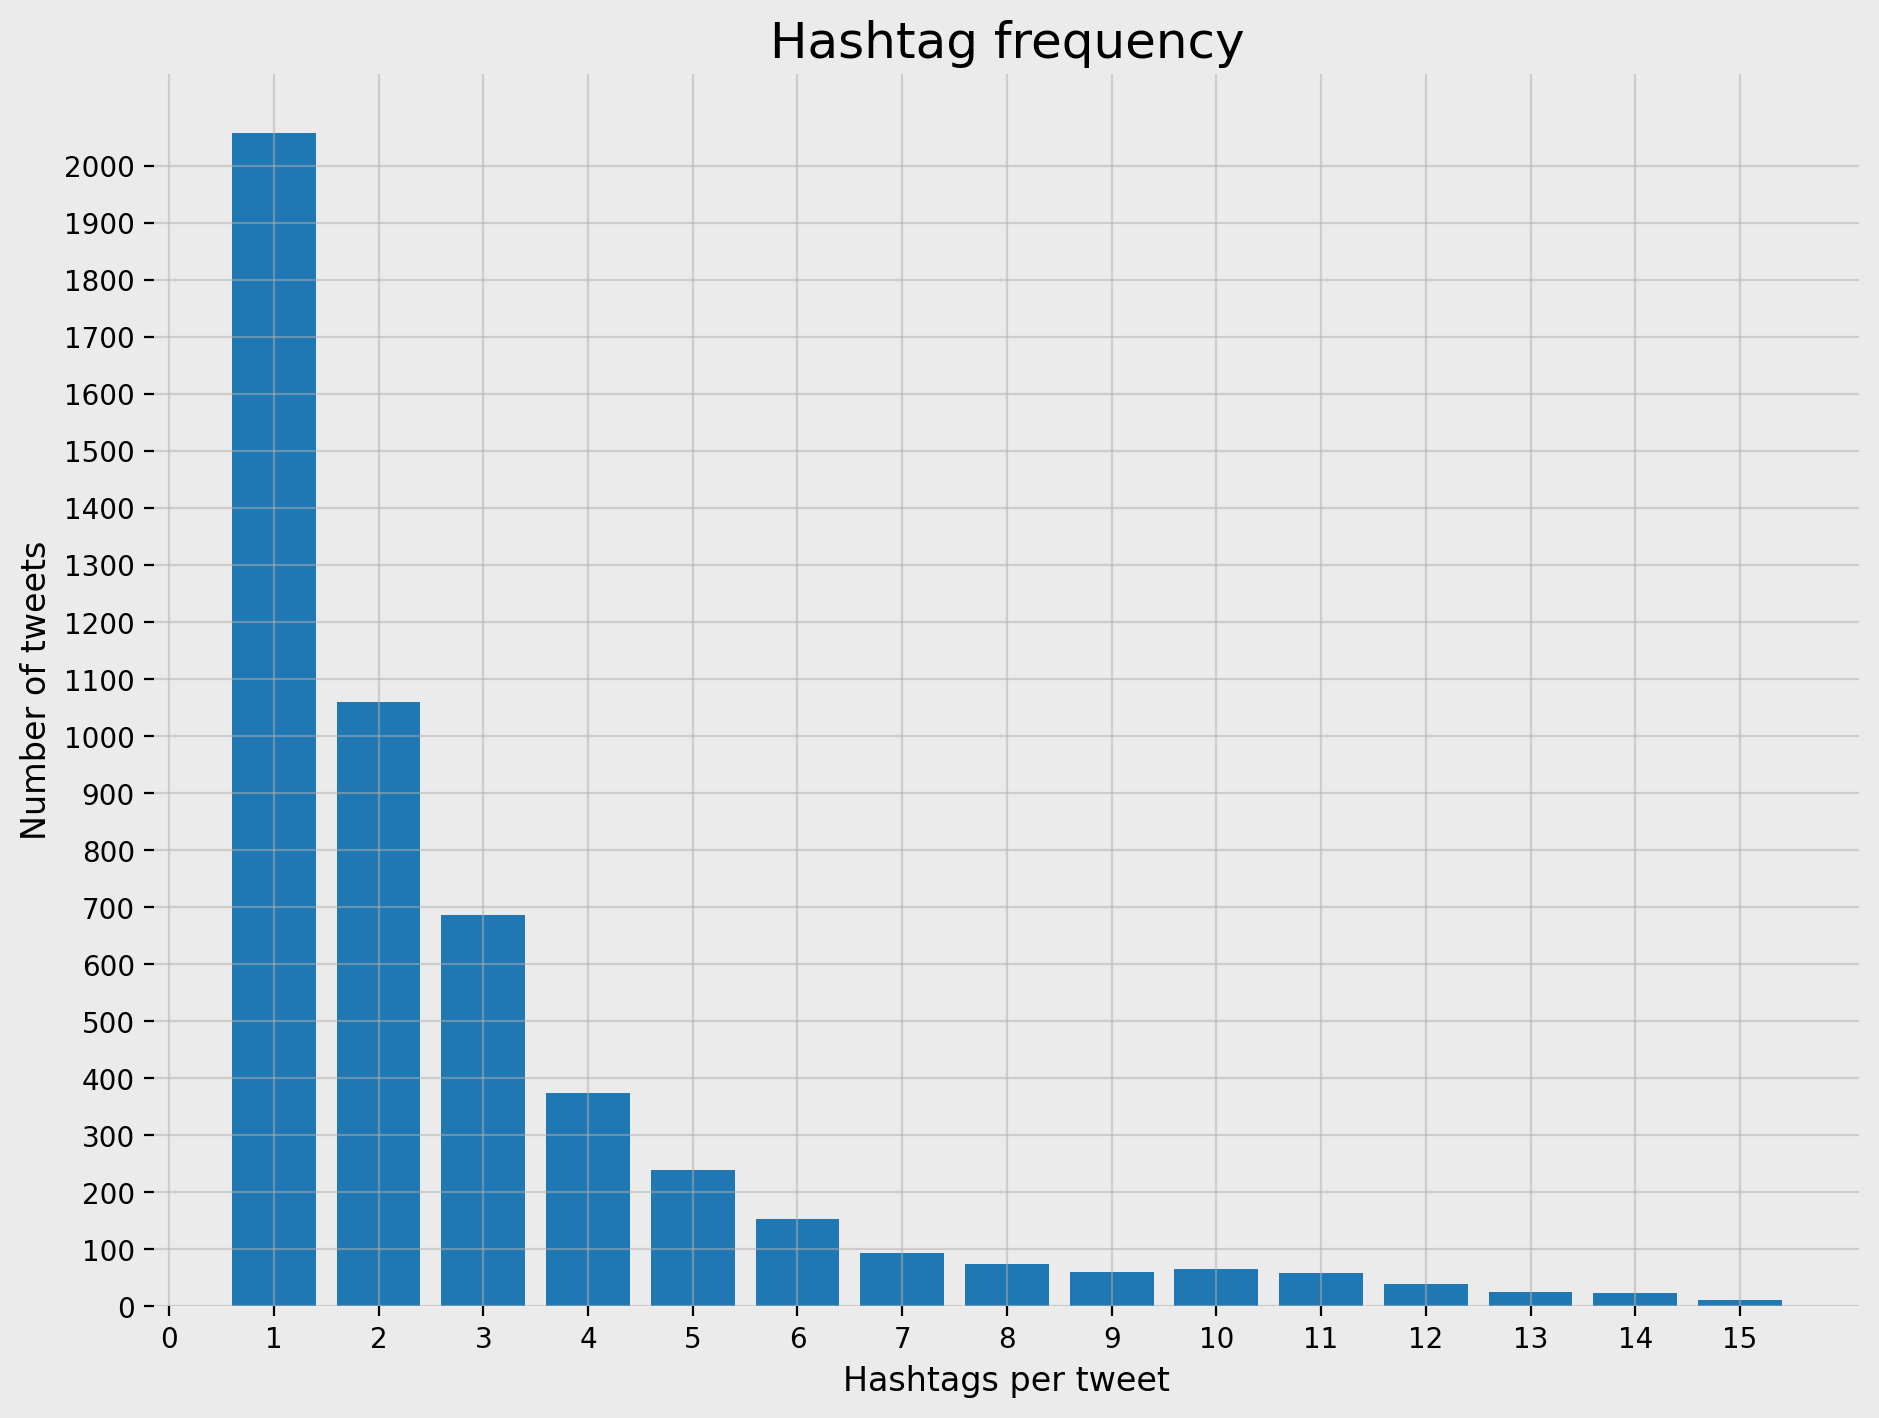

In [13]:
plt.figure(facecolor='#ebebeb', figsize=(11, 8))
plt.bar([x[0] for x in hashtag_summary['hashtag_freq'][:15]],
        [x[1] for x in hashtag_summary['hashtag_freq'][:15]])
plt.title('Hashtag frequency', fontsize=18)
plt.xlabel('Hashtags per tweet', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.xticks(range(16))
plt.yticks(range(0, 2100, 100))
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [14]:
hashtag_summary['top_hashtags'][:10]

[('#justdoit', 5150),
 ('#nike', 1112),
 ('#colinkaepernick', 208),
 ('#takeaknee', 138),
 ('#kaepernick', 137),
 ('#nfl', 106),
 ('#nflkickoff', 75),
 ('#imwithkap', 73),
 ('#nikead', 70),
 ('#nikeboycott', 69)]

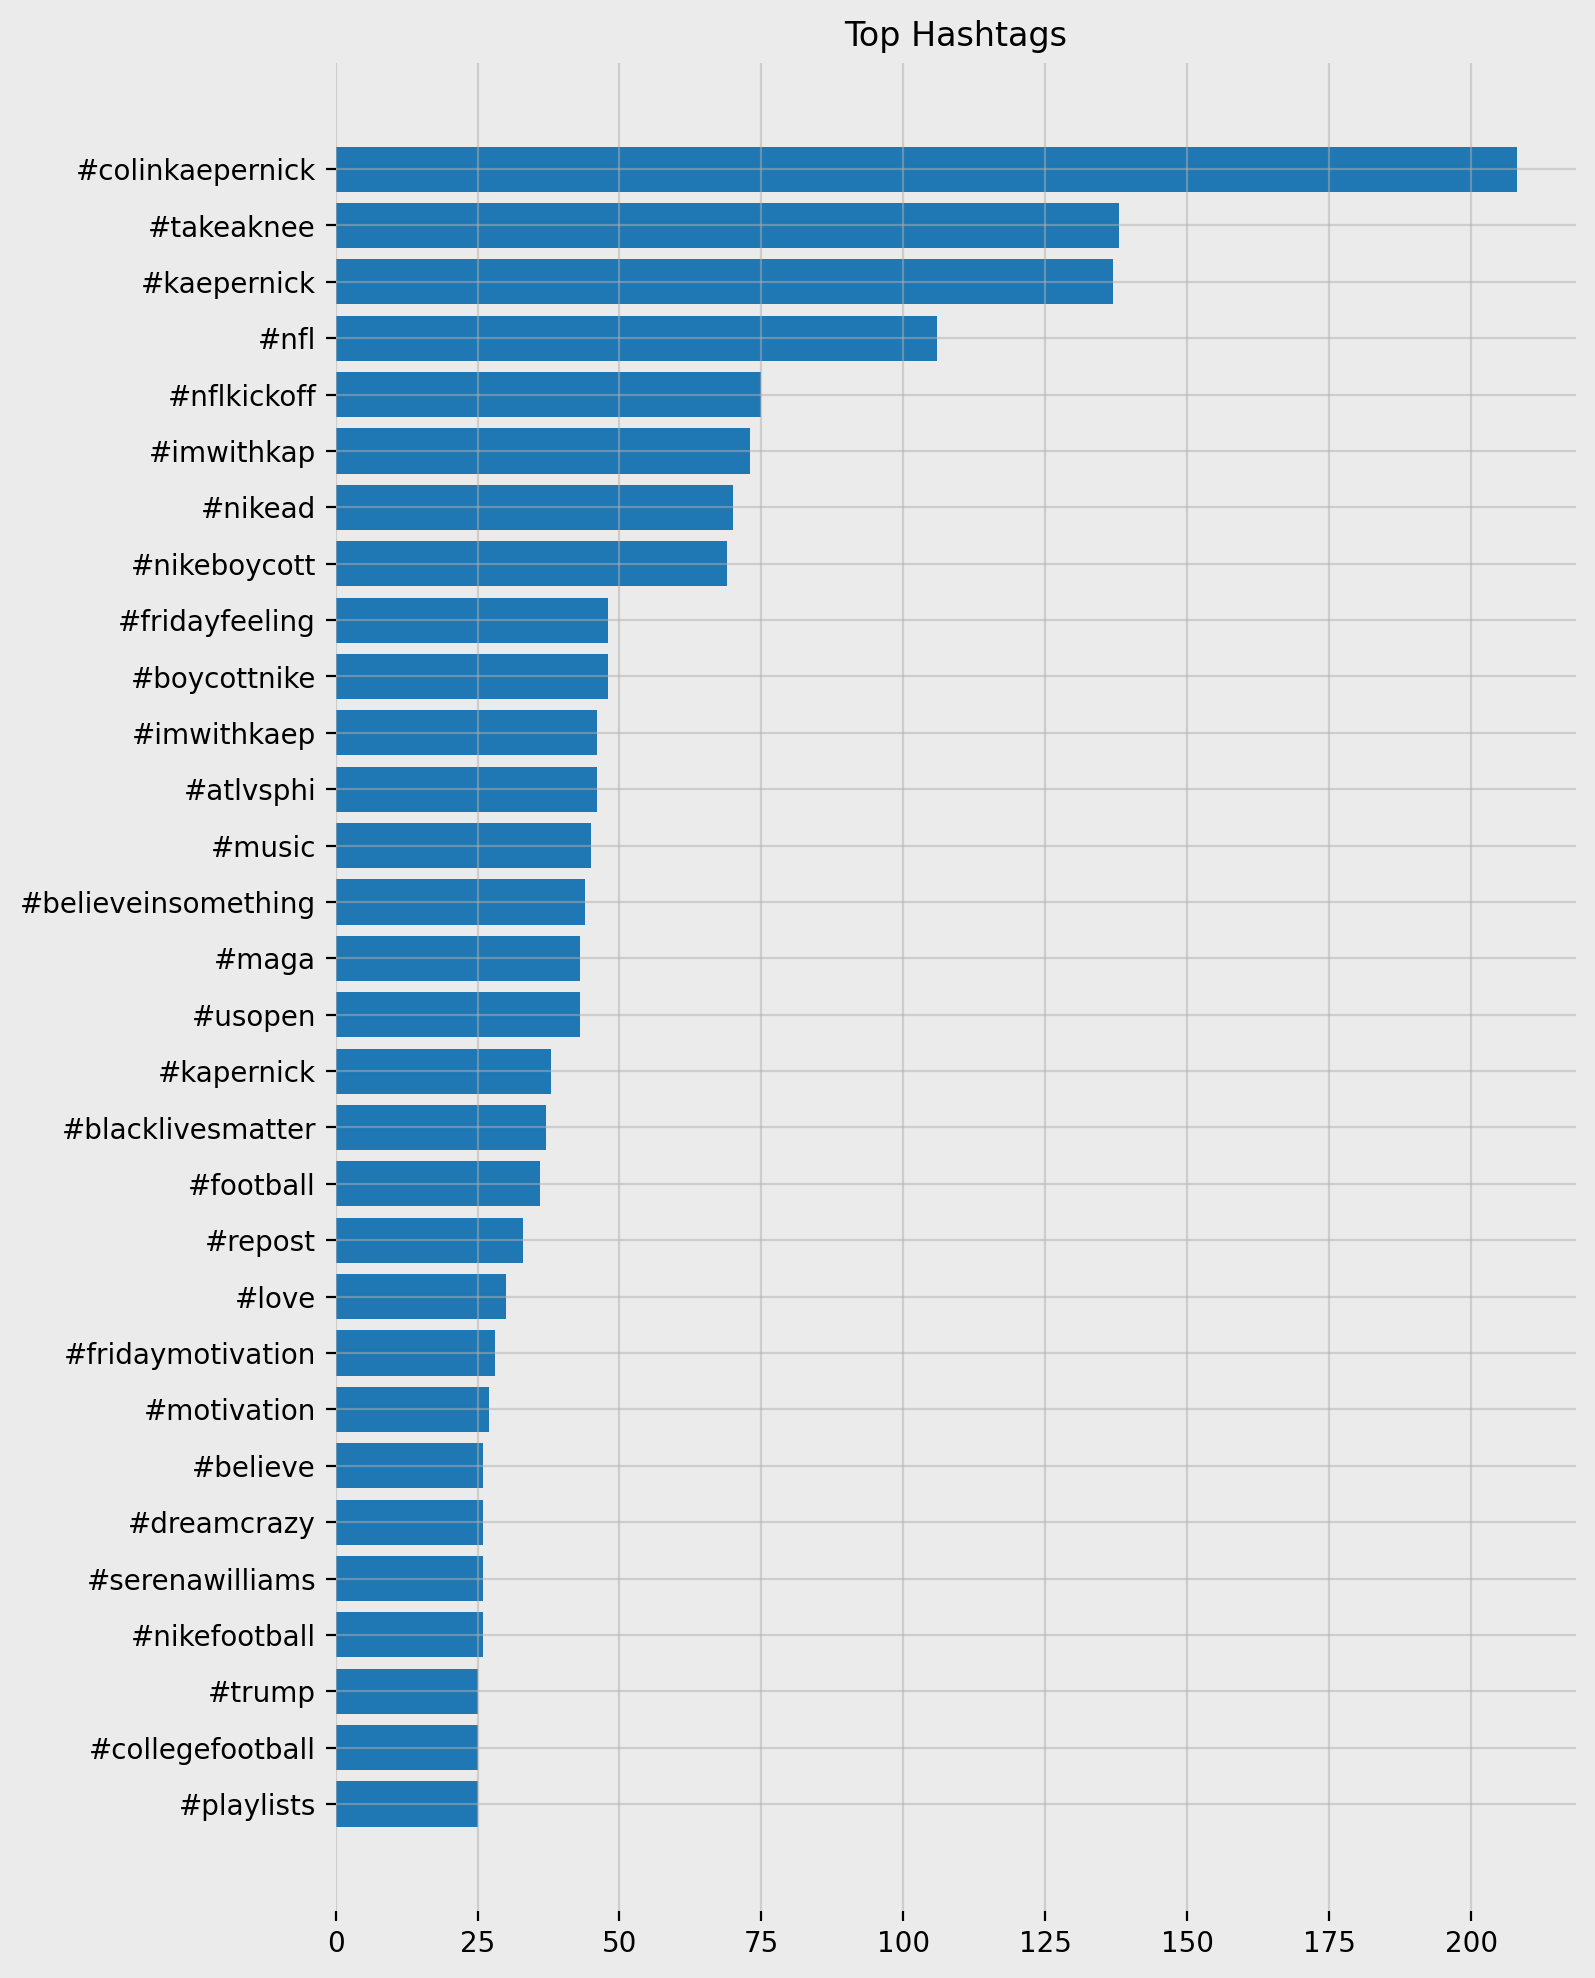

In [15]:
plt.figure(facecolor='#ebebeb', figsize=(8, 12))
plt.barh([x[0] for x in hashtag_summary['top_hashtags'][2:][:30]][::-1],
         [x[1] for x in hashtag_summary['top_hashtags'][2:][:30]][::-1])
plt.title('Top Hashtags')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

<a id='emoji'></a>
## Emoji

You will see that the `extract_emoji` function is pretty much the same as `extract_hashtags`. The only difference is that it has emoji both as images and their textual counterparts.

In [16]:
emoji_summary = adv.extract_emoji(tweets_users_df['tweet_full_text'])
emoji_summary.keys()

dict_keys(['emoji', 'emoji_text', 'emoji_flat', 'emoji_flat_text', 'emoji_counts', 'emoji_freq', 'top_emoji', 'top_emoji_text', 'top_emoji_groups', 'top_emoji_sub_groups', 'overview'])

In [18]:
emoji_summary['overview']

{'num_posts': 5089,
 'num_emoji': 3187,
 'emoji_per_post': 0.626252701906072,
 'unique_emoji': 421}

In [19]:
emoji_summary['emoji'][:20]

[[],
 ['👨\u200d🚒', '👨\u200d🚒', '💯', '🎥', '🔥', '✊🏿'],
 ['🍪', '😂'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['🤔', '🙄', '😳'],
 [],
 [],
 []]

In [20]:
emoji_summary['emoji_text'][:20]

[[],
 ['man firefighter',
  'man firefighter',
  'hundred points',
  'movie camera',
  'fire',
  'raised fist: dark skin tone'],
 ['cookie', 'face with tears of joy'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['thinking face', 'face with rolling eyes', 'flushed face'],
 [],
 [],
 []]

In [21]:
emoji_summary['emoji_flat'][:10]

['👨\u200d🚒', '👨\u200d🚒', '💯', '🎥', '🔥', '✊🏿', '🍪', '😂', '🤔', '🙄']

In [22]:
emoji_summary['emoji_flat_text'][:10]

['man firefighter',
 'man firefighter',
 'hundred points',
 'movie camera',
 'fire',
 'raised fist: dark skin tone',
 'cookie',
 'face with tears of joy',
 'thinking face',
 'face with rolling eyes']

In [23]:
list(zip(emoji_summary['emoji_flat'][:10], emoji_summary['emoji_flat_text'][:10]))

[('👨\u200d🚒', 'man firefighter'),
 ('👨\u200d🚒', 'man firefighter'),
 ('💯', 'hundred points'),
 ('🎥', 'movie camera'),
 ('🔥', 'fire'),
 ('✊🏿', 'raised fist: dark skin tone'),
 ('🍪', 'cookie'),
 ('😂', 'face with tears of joy'),
 ('🤔', 'thinking face'),
 ('🙄', 'face with rolling eyes')]

In [24]:
emoji_summary['emoji_counts'][:15]

[0, 6, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [25]:
emoji_summary['emoji_freq'][:15]

[(0, 3952),
 (1, 501),
 (2, 224),
 (3, 153),
 (4, 82),
 (5, 54),
 (6, 52),
 (7, 18),
 (8, 8),
 (9, 5),
 (10, 4),
 (11, 7),
 (12, 7),
 (13, 4),
 (14, 3)]

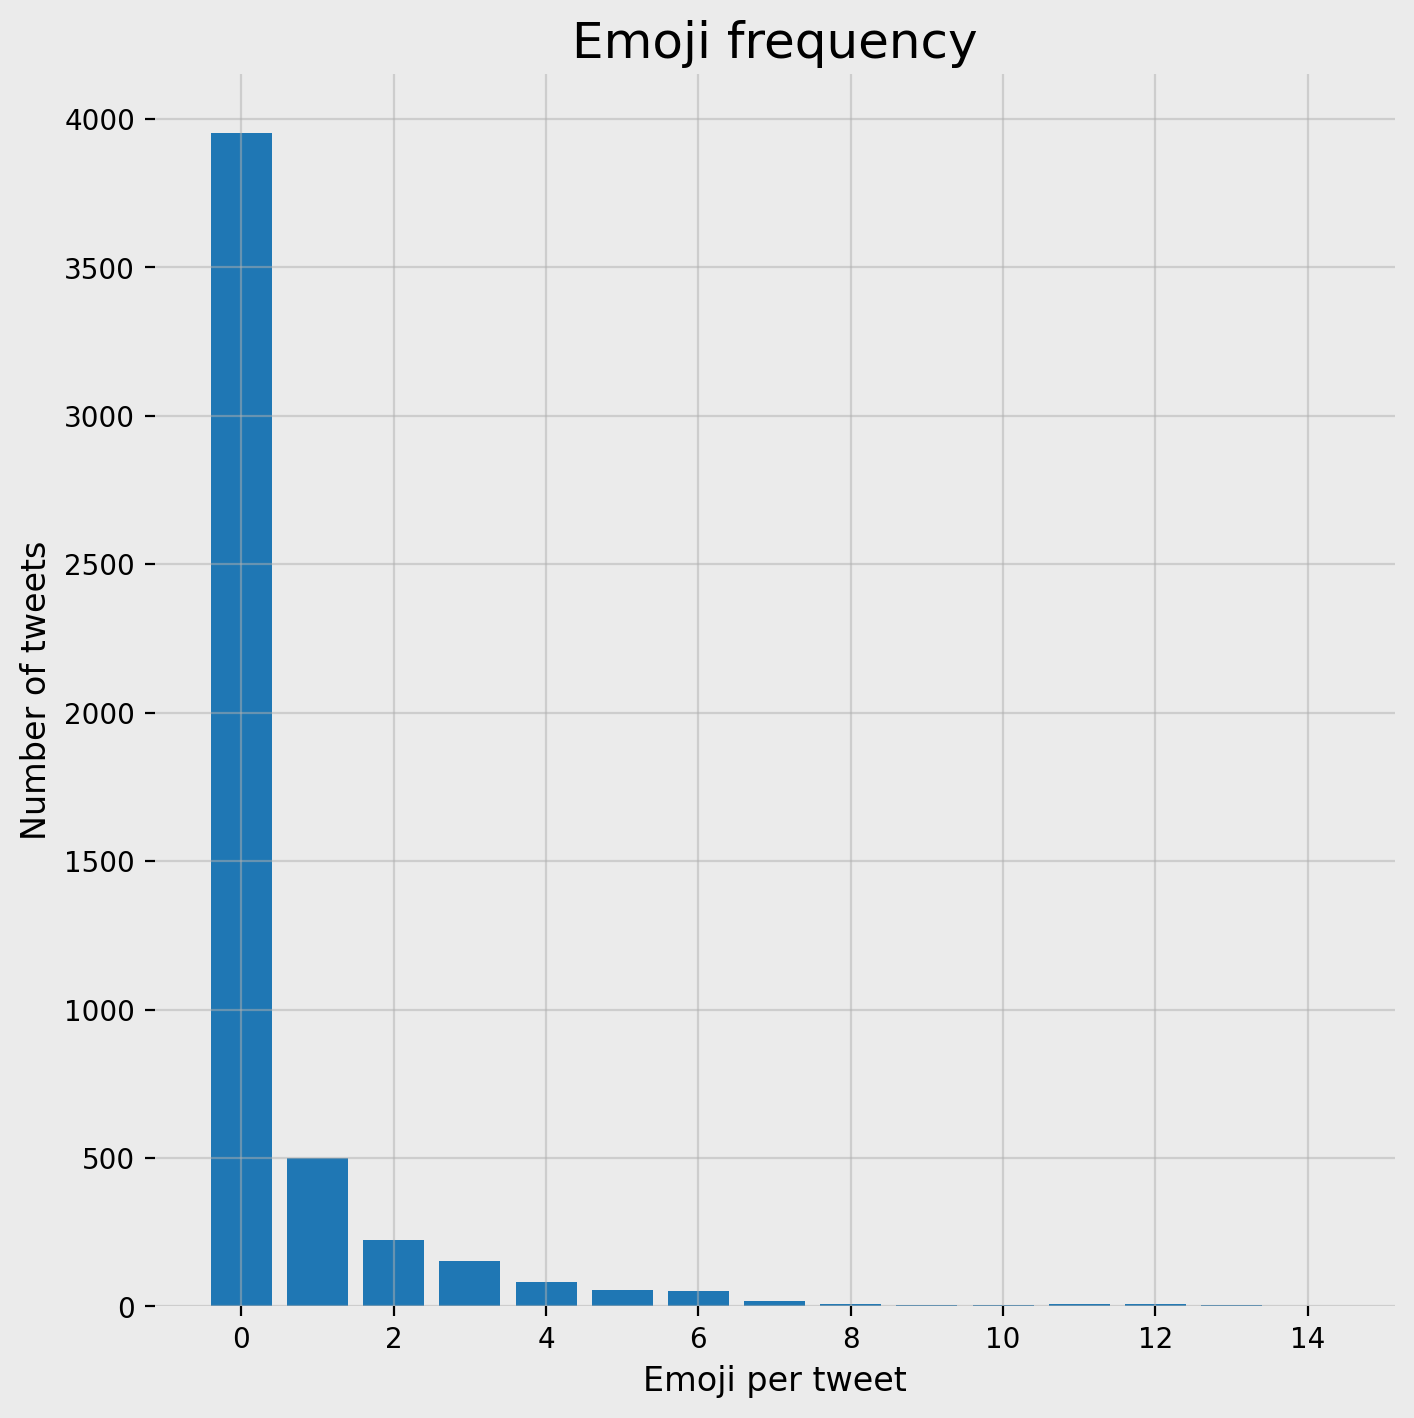

In [26]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.bar([x[0] for x in emoji_summary['emoji_freq'][:15]],
        [x[1] for x in emoji_summary['emoji_freq'][:15]])
plt.title('Emoji frequency', fontsize=18)
plt.xlabel('Emoji per tweet', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [27]:
emoji_summary['top_emoji'][:20]

[('😂', 535),
 ('🤣', 177),
 ('✔️', 136),
 ('🔥', 122),
 ('🏈', 80),
 ('❤️', 69),
 ('💯', 50),
 ('💙', 49),
 ('🇺🇸', 48),
 ('😭', 46),
 ('✊🏾', 42),
 ('👟', 39),
 ('✊🏽', 37),
 ('👀', 37),
 ('🤔', 31),
 ('💩', 30),
 ('👏', 29),
 ('😎', 28),
 ('🙌🏽', 28),
 ('⭐', 28)]

In [28]:
emoji_summary['top_emoji_text'][:20]

[('face with tears of joy', 535),
 ('rolling on the floor laughing', 177),
 ('check mark', 163),
 ('fire', 122),
 ('red heart', 83),
 ('american football', 80),
 ('hundred points', 50),
 ('blue heart', 49),
 ('flag: United States', 48),
 ('loudly crying face', 46),
 ('raised fist: medium-dark skin tone', 42),
 ('running shoe', 39),
 ('raised fist: medium skin tone', 37),
 ('eyes', 37),
 ('thinking face', 31),
 ('pile of poo', 30),
 ('clapping hands', 29),
 ('smiling face with sunglasses', 28),
 ('raising hands: medium skin tone', 28),
 ('star', 28)]

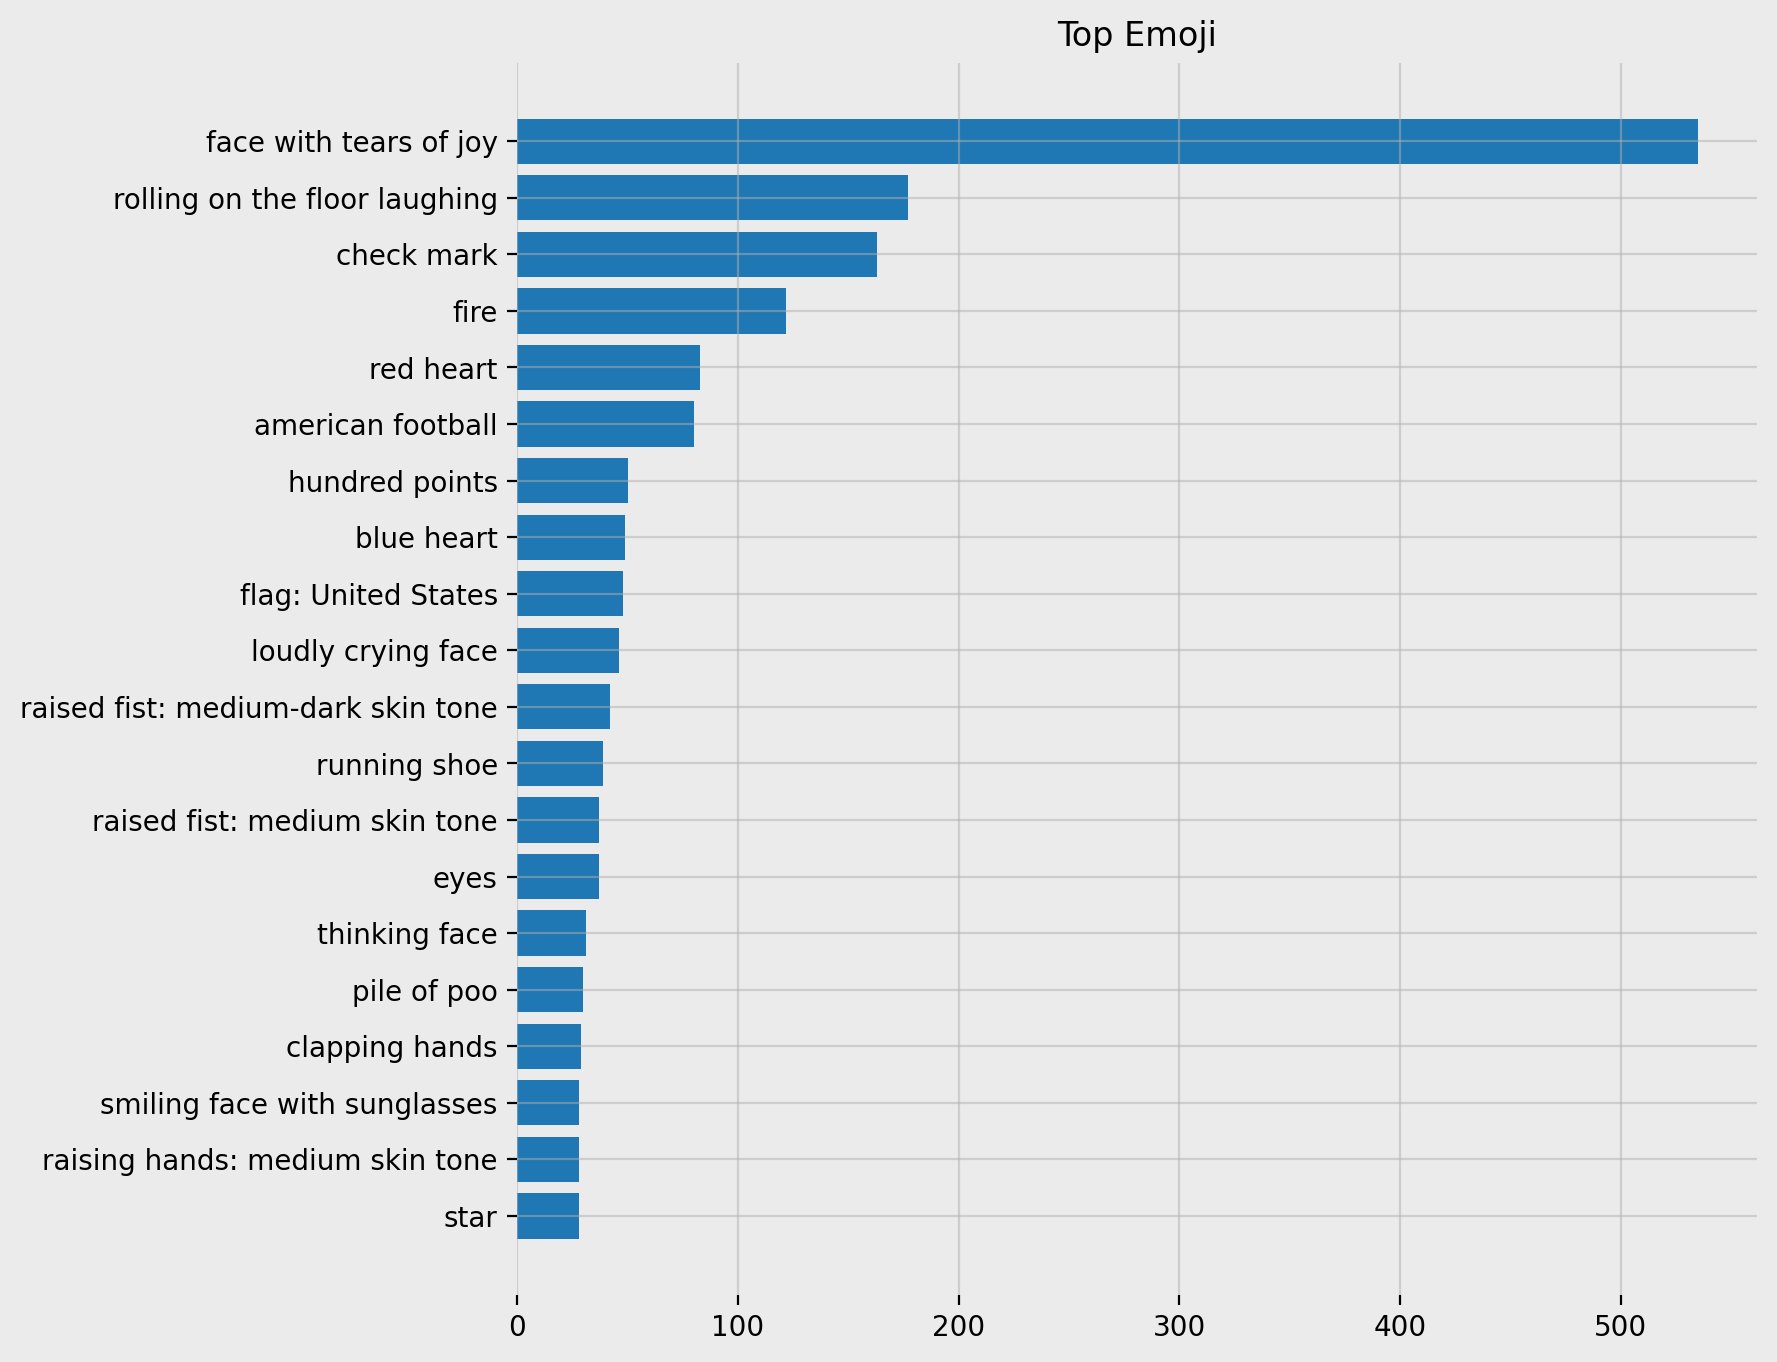

In [29]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.barh([x[0] for x in emoji_summary['top_emoji_text'][:20]][::-1],
         [x[1] for x in emoji_summary['top_emoji_text'][:20]][::-1])
plt.title('Top Emoji')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

<a id='mentions'></a>
## Mentions

Again, by now it should be familiar, and you will be able to guess the names of the keys and what they would produce.

In [30]:
mention_summary = adv.extract_mentions(tweets_users_df['tweet_full_text'])
mention_summary.keys()

dict_keys(['mentions', 'mentions_flat', 'mention_counts', 'mention_freq', 'top_mentions', 'overview'])

In [31]:
mention_summary['overview']

{'num_posts': 5089,
 'num_mentions': 4863,
 'mentions_per_post': 0.9555904892906268,
 'unique_mentions': 1624}

In [32]:
mention_summary['mentions'][:15]

[[],
 [],
 [],
 [],
 [],
 ['@realdonaldtrump'],
 [],
 ['@nike'],
 ['@nike', '@nikestore', '@kaepernick7'],
 [],
 [],
 ['@nike'],
 ['@cspensions'],
 ['@realdonaldtrump', '@colinkaperneck7'],
 ['@repadamschiff', '@repadamschiff']]

In [33]:
mention_summary['mentions_flat'][:10]

['@realdonaldtrump',
 '@nike',
 '@nike',
 '@nikestore',
 '@kaepernick7',
 '@nike',
 '@cspensions',
 '@realdonaldtrump',
 '@colinkaperneck7',
 '@repadamschiff']

In [34]:
mention_summary['mention_counts'][:20]

[0, 0, 0, 0, 0, 1, 0, 1, 3, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0]

In [35]:
mention_summary['mention_freq'][:15]

[(0, 2738),
 (1, 1386),
 (2, 602),
 (3, 193),
 (4, 66),
 (5, 34),
 (6, 18),
 (7, 8),
 (8, 3),
 (9, 4),
 (10, 1),
 (11, 4),
 (12, 2),
 (13, 1),
 (14, 2)]

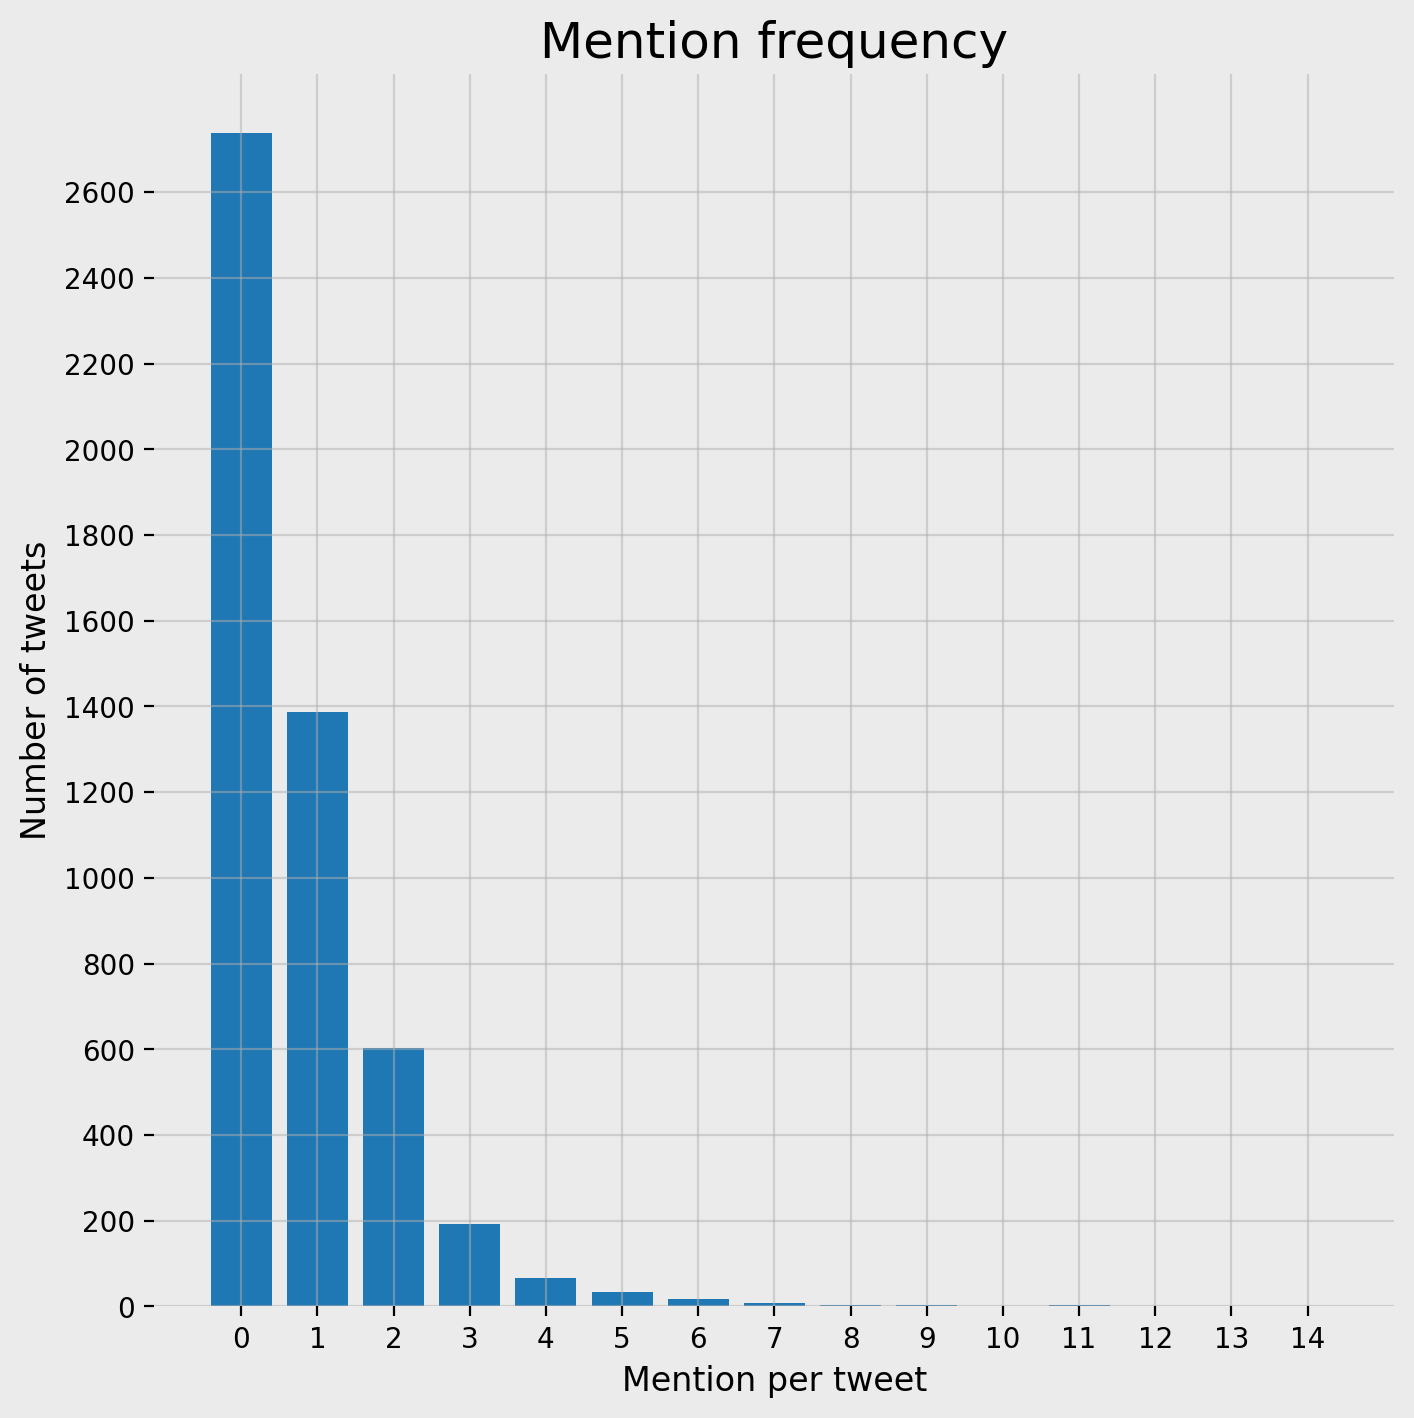

In [36]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.bar([x[0] for x in mention_summary['mention_freq'][:15]],
        [x[1] for x in mention_summary['mention_freq'][:15]])
plt.title('Mention frequency', fontsize=18)
plt.xlabel('Mention per tweet', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.xticks(range(15))
plt.yticks(range(0, 2800, 200))
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [37]:
mention_summary['top_mentions'][:10]

[('@nike', 964),
 ('@kaepernick7', 493),
 ('@realdonaldtrump', 412),
 ('@serenawilliams', 84),
 ('@nfl', 65),
 ('@youtube', 38),
 ('@corybooker', 36),
 ('@potus', 29),
 ('@kingjames', 27),
 ('@nflcommish', 21)]

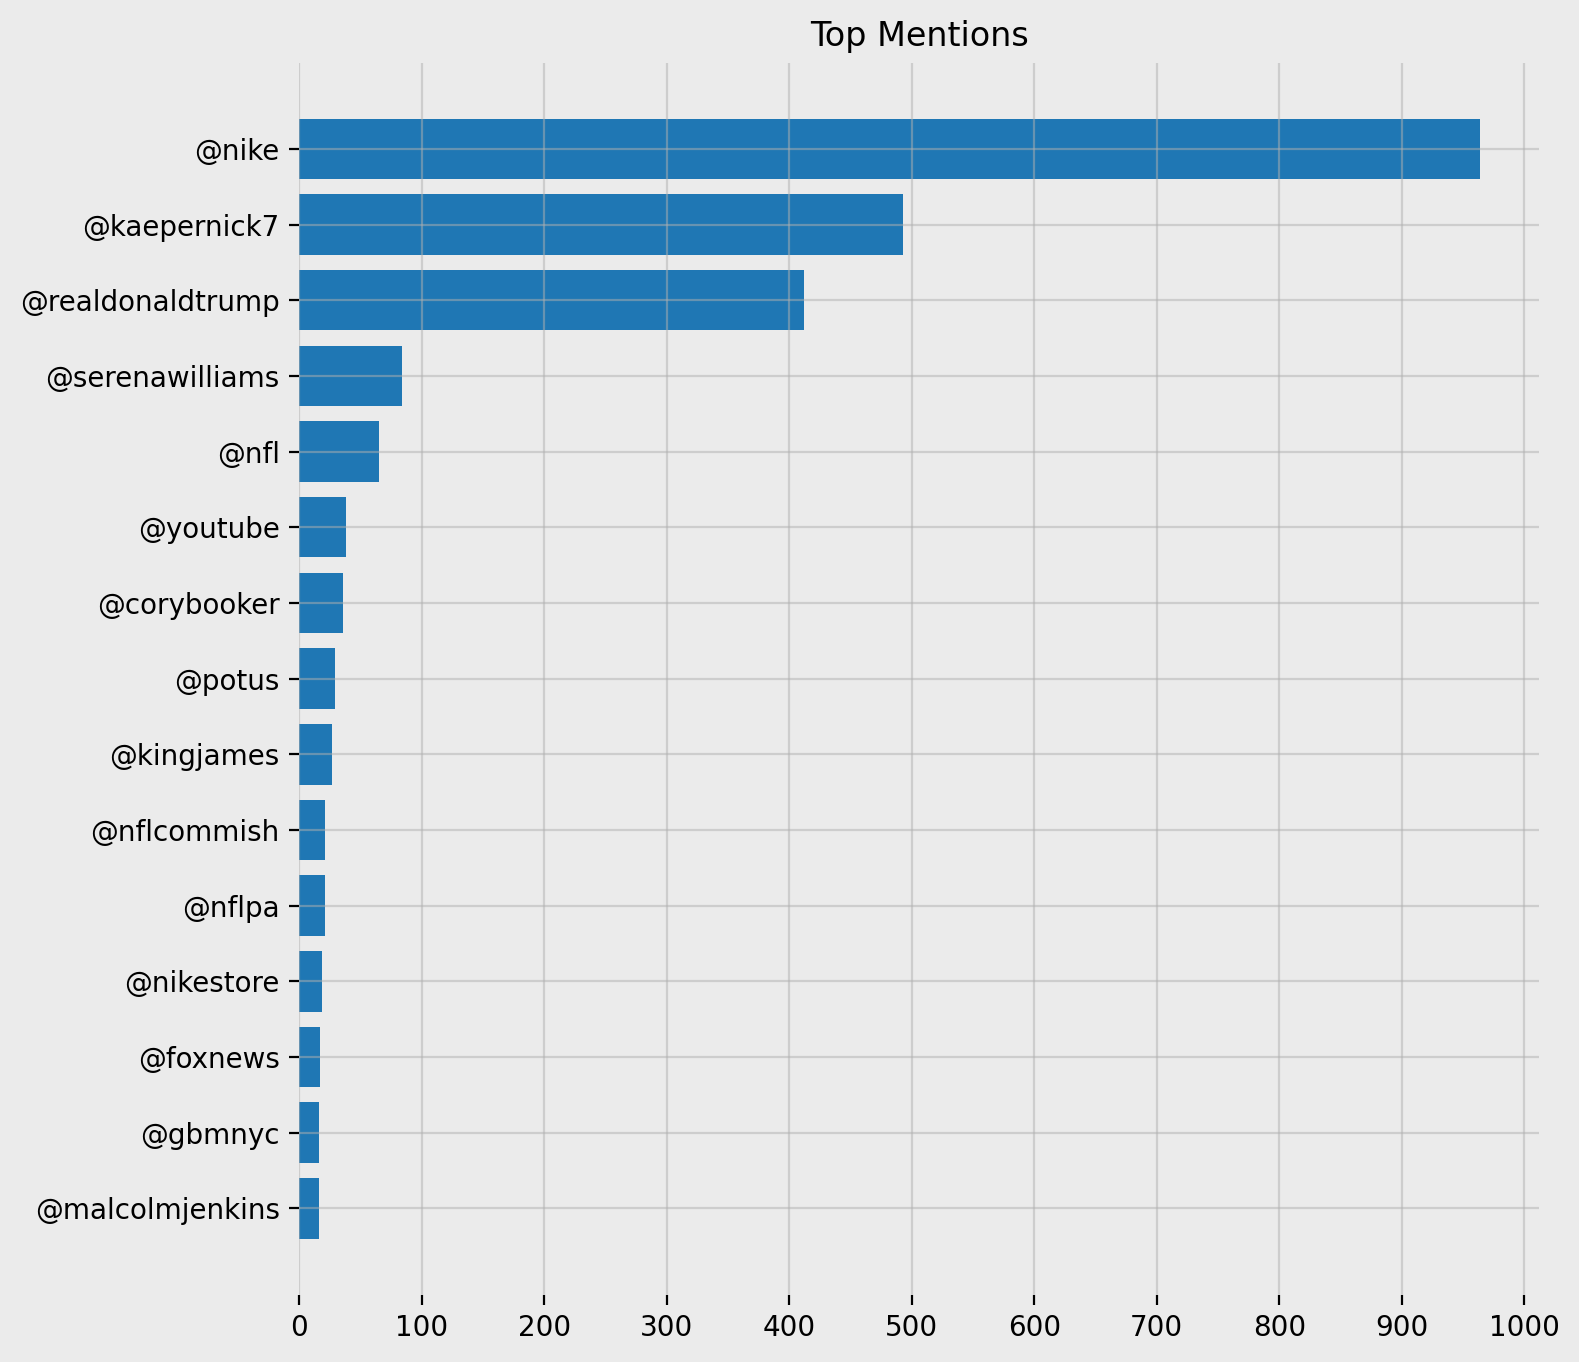

In [38]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.barh([x[0] for x in mention_summary['top_mentions'][:15]][::-1],
         [x[1] for x in mention_summary['top_mentions'][:15]][::-1])
plt.title('Top Mentions')
plt.grid(alpha=0.5)
plt.xticks(range(0, 1100, 100))
plt.gca().set_frame_on(False)

<a id='questions'></a>
## Questions

In [39]:
question_summary = adv.extract_questions(tweets_users_df['tweet_full_text'])

In [40]:
question_summary.keys()

dict_keys(['question_marks', 'question_marks_flat', 'question_mark_counts', 'question_mark_freq', 'top_question_marks', 'overview', 'question_mark_names', 'question_text'])

In [41]:
question_summary['overview']

{'num_posts': 5089,
 'num_question_marks': 674,
 'question_marks_per_post': 0.13244252308901552,
 'unique_question_marks': 1}

In [42]:
question_summary['question_mark_freq']

[(0, 4590), (1, 391), (2, 62), (3, 34), (4, 7), (5, 3), (6, 1), (8, 1)]

In [43]:
question_summary['top_question_marks'] # this is more interesting if you have questions in different languages where different question marks are used.

[('?', 674)]

In [44]:
[(i,x) for i, x in  enumerate(question_summary['question_text']) if x][:15]

[(6, ["Why won't Trump protect our elections?"]),
 (17, ['You want to impress me?']),
 (30,
  ['But what exactly does sacrifice mean to a multi-billion dollar corporation?']),
 (45, ['Do I have your back?']),
 (50, ['Invest in #Mojo50?']),
 (58, ['Were you surprised?']),
 (81, ['Owned Yet, Libs?']),
 (87,
  ["Slave owners and private prisons have used black men and women as a political and financial piece for gain\n\nBut people are mad that nike is putting money in Kaepernick's pockets giving a world platform for a message of racial injustice?"]),
 (105, ['Can commerce and activism coexist?']),
 (106, ['See the difference?']),
 (107, ['School shooting?']),
 (125,
  ['@Kaepernick7 I salute #justdoit and to those human beings burning their #bikes that they already paid for - why couldn’t they all just donate those shoes to those that don’t even know what a shoe is?']),
 (126, ['Her solution?']),
 (131,
  ['200 smoooooooth writing/drawing pages are calling your name - have you ordered you

<a id='intense_words'></a>
## Intense Words

In [45]:
intense_summary = adv.extract_intense_words(tweets_users_df['tweet_full_text'], min_reps=3)

In [46]:
intense_summary['overview']

{'num_posts': 5089,
 'num_intense_words': 1274,
 'intense_words_per_post': 0.25034387895460797,
 'unique_intense_words': 979}

In [47]:
intense_summary['top_intense_words'][:20]

[('...', 41),
 ('😂😂😂', 27),
 ('・・・', 20),
 ('!!!', 15),
 ('@MatthewWolfff', 13),
 ('😂😂😂😂', 12),
 ('!!!!', 10),
 ('🔥🔥🔥', 9),
 ('🤣🤣🤣', 9),
 ('it...', 9),
 ('....', 7),
 ('Nike!!!', 5),
 ('it!!!', 5),
 ('🤣🤣🤣🤣🤣', 5),
 ('@PaylessInsider!!!', 5),
 ('@Baby___Del', 4),
 ('@Mongo444444', 4),
 ('@Briteeye777', 4),
 ('🤣🤣🤣🤣', 4),
 ('crazy...', 4)]

<a id='currency'></a>
## Currency Symbols

In [48]:
currency_summary = adv.extract_currency(tweets_users_df['tweet_full_text'])

In [49]:
currency_summary.keys()

dict_keys(['currency_symbols', 'currency_symbols_flat', 'currency_symbol_counts', 'currency_symbol_freq', 'top_currency_symbols', 'overview', 'currency_symbol_names', 'surrounding_text'])

In [50]:
currency_summary['overview']

{'num_posts': 5089,
 'num_currency_symbols': 65,
 'currency_symbols_per_post': 0.012772646885439182,
 'unique_currency_symbols': 1}

It seems there isn't much talk about money, with 1.2% of the tweets containing currency symbols. Let's see what they are.

In [51]:
currency_summary['top_currency_symbols']

[('$', 65)]

In [52]:
[x for x in currency_summary['surrounding_text'] if x][:20]

[['Nike got $43 million of free p'],
 [' confirm Kavanaugh. $20.20 is a small pri'],
 ['ending any leftover $ after funding @Sena'],
 ['Tier 1: $50/year ', 'Tier 2: $100/year '],
 ['oor foreign workers $0.20 an hour #JustDo'],
 [' spend considerable $ are gen x conservat',
  'pending, #justdoit, $NKE lol.'],
 ["just Doing It' 👟for $ 0.23 an hour😳😡",
  'he #NikeAd ? Was it $0.23 an hour?🤔'],
 ['flip flops for only $25! #JustDoIt'],
 ['urrent #stock price $80 and some change. '],
 ['t black kids buying $200 Jordan’s and you',
  'rofessionals buying $350 Nike Apple Watch',
  'some hick burning a $10 pair of socks tha'],
 ['e “Buzz” equated to $163.5 million in val'],
 ['livery service. Get $7 off your next orde'],
 ['m credited and some $ for their art?!!! h'],
 ['#JustDoIt @elonmusk $tsla'],
 ['ainability and save $26 trillion. Why are'],
 ['ille Jury Fines Man $1 for Punching White'],
 ['founder gave nearly $400,000 to Trump. @N'],
 ['w...and he just got $30 mil for this ad??'],
 ['on! 

In [53]:
pip install advertools networkx matplotlib pandas


In [54]:
# Create a network graph for hashtags
G_hashtags = nx.Graph()


In [ ]:
# Adding edges for hashtags co-occurrences
for hashtags in hashtag_summary['hashtags']:
    for i in range(len(hashtags)):
        for j in range(i + 1, len(hashtags)):
            if G_hashtags.has_edge(hashtags[i], hashtags[j]):
                G_hashtags[hashtags[i]][hashtags[j]]['weight'] += 1
            else:
                G_hashtags.add_edge(hashtags[i], hashtags[j], weight=1)

# Create a network graph for mentions
G_mentions = nx.Graph()

# Adding edges for mentions co-occurrences
for mentions in mention_summary['mentions']:
    for i in range(len(mentions)):
        for j in range(i + 1, len(mentions)):
            if G_mentions.has_edge(mentions[i], mentions[j]):
                G_mentions[mentions[i]][mentions[j]]['weight'] += 1
            else:
                G_mentions.add_edge(mentions[i], mentions[j], weight=1)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12450 (\N{KATAKANA LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython

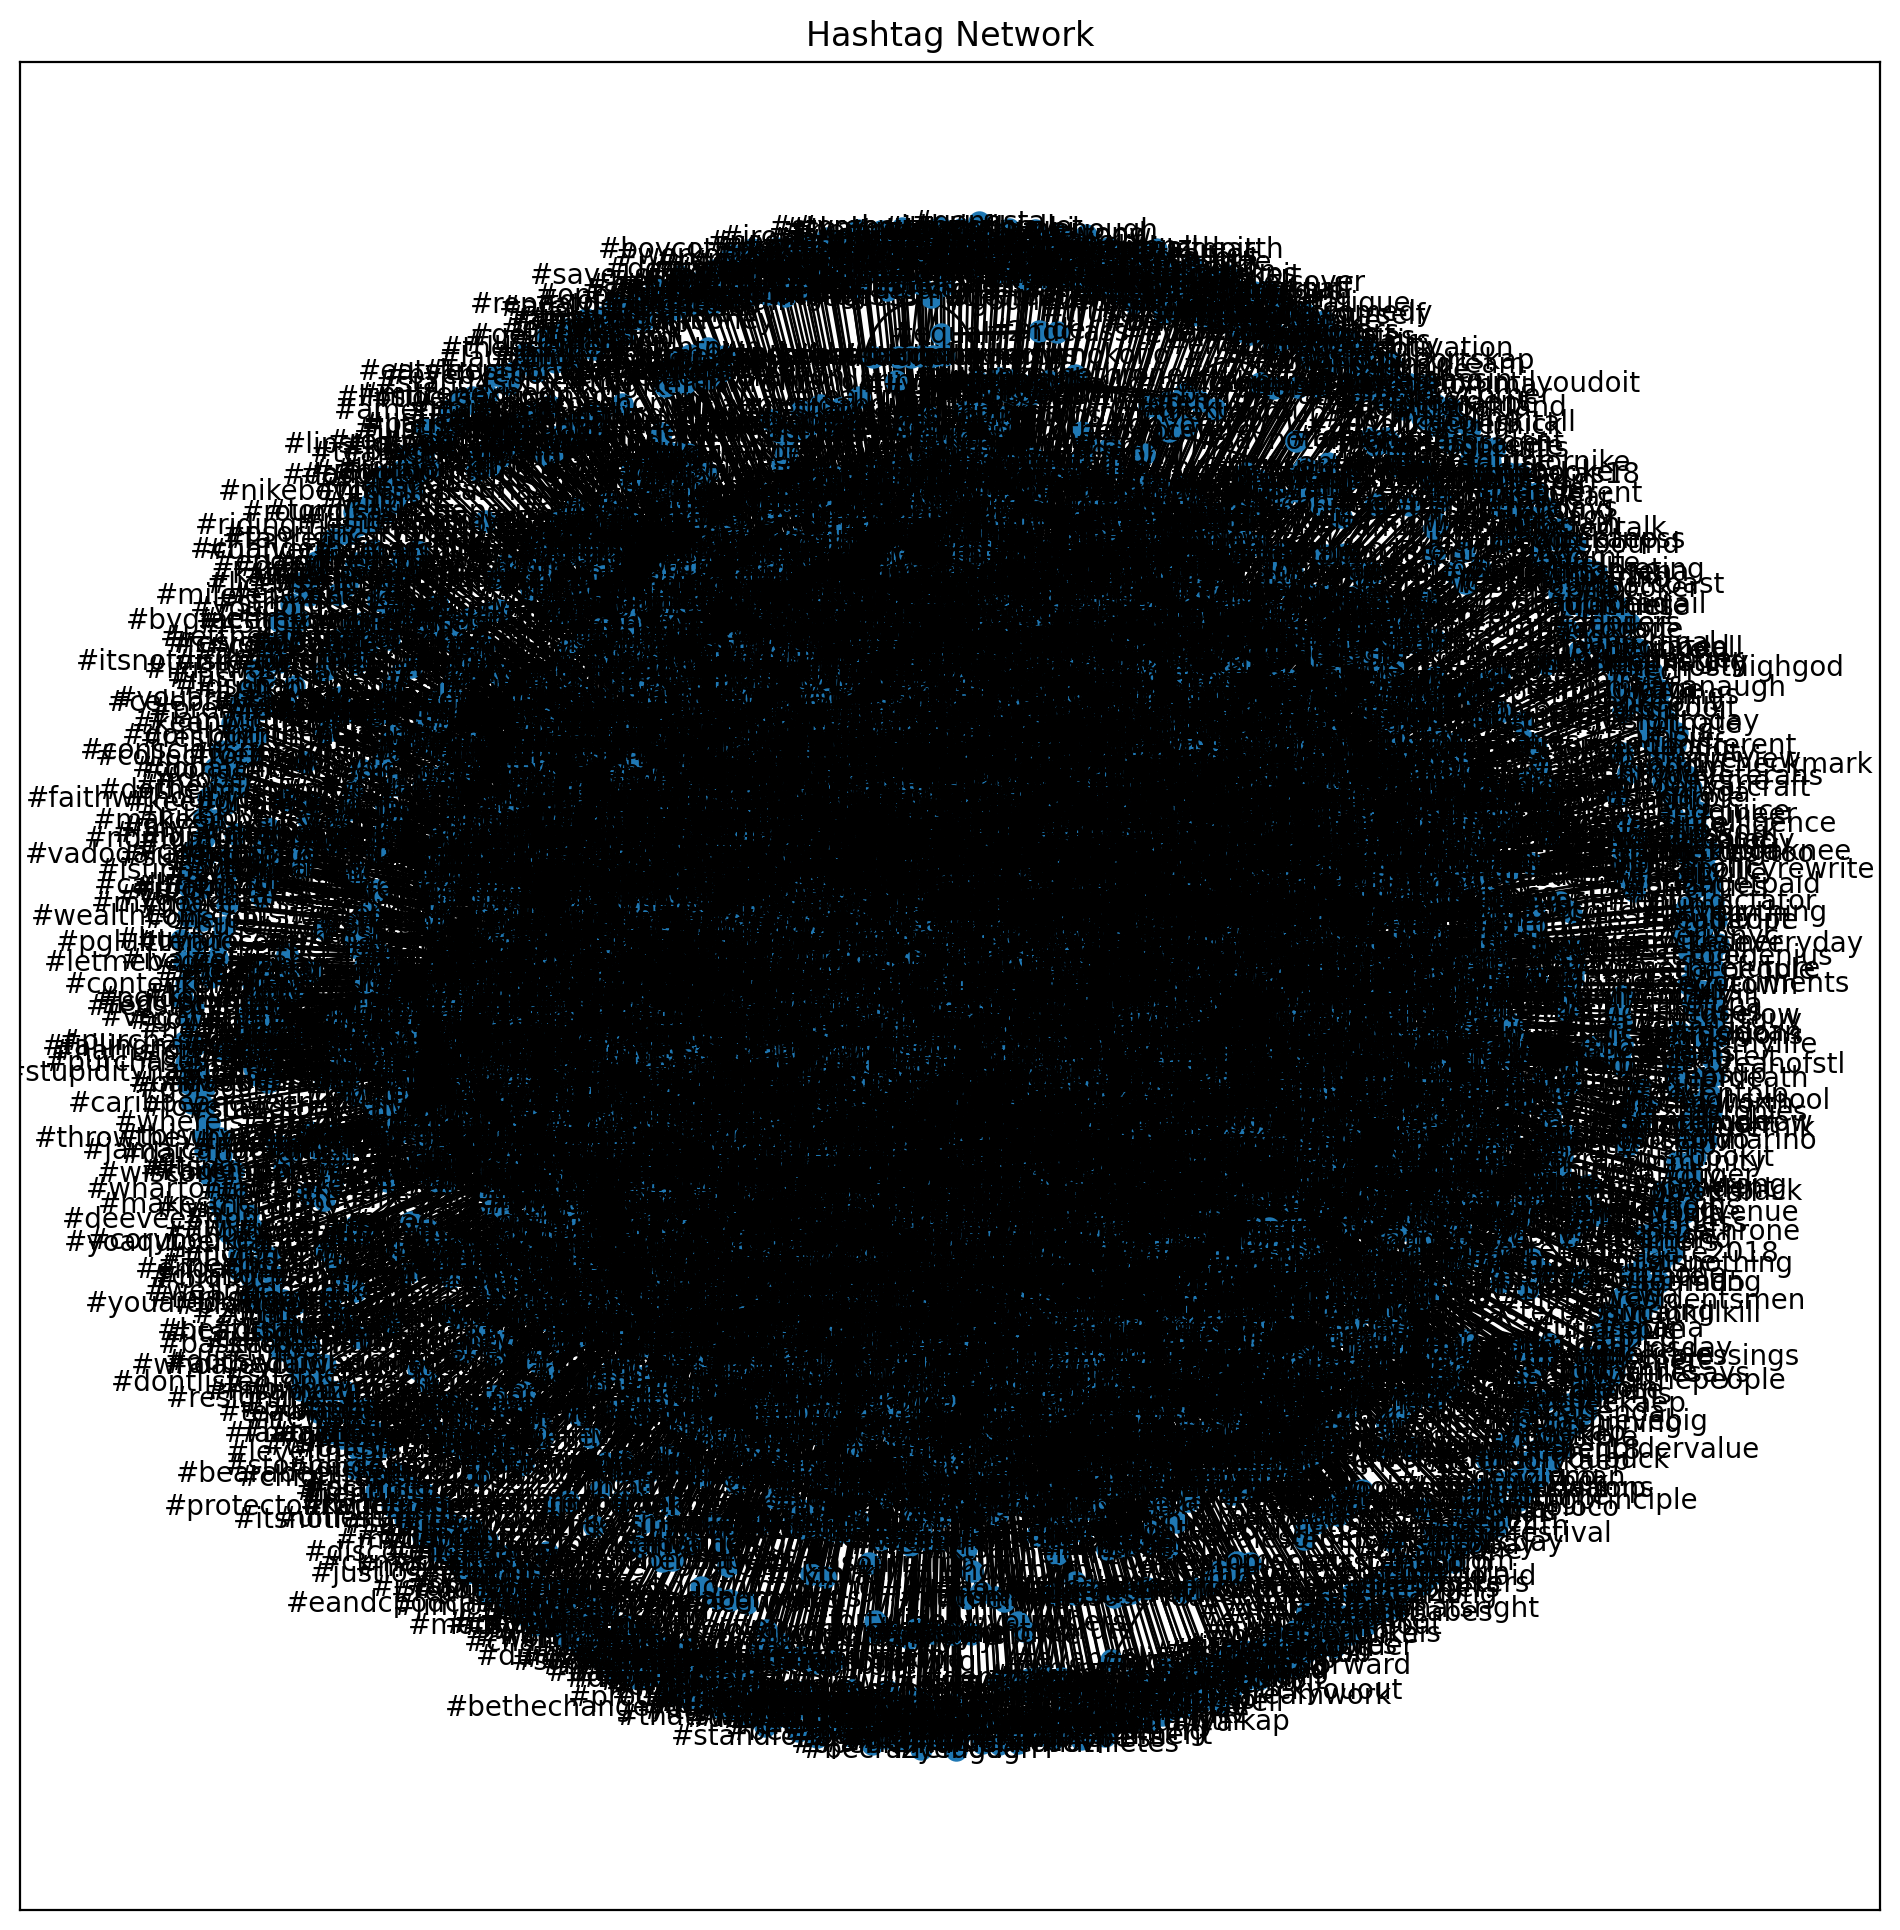

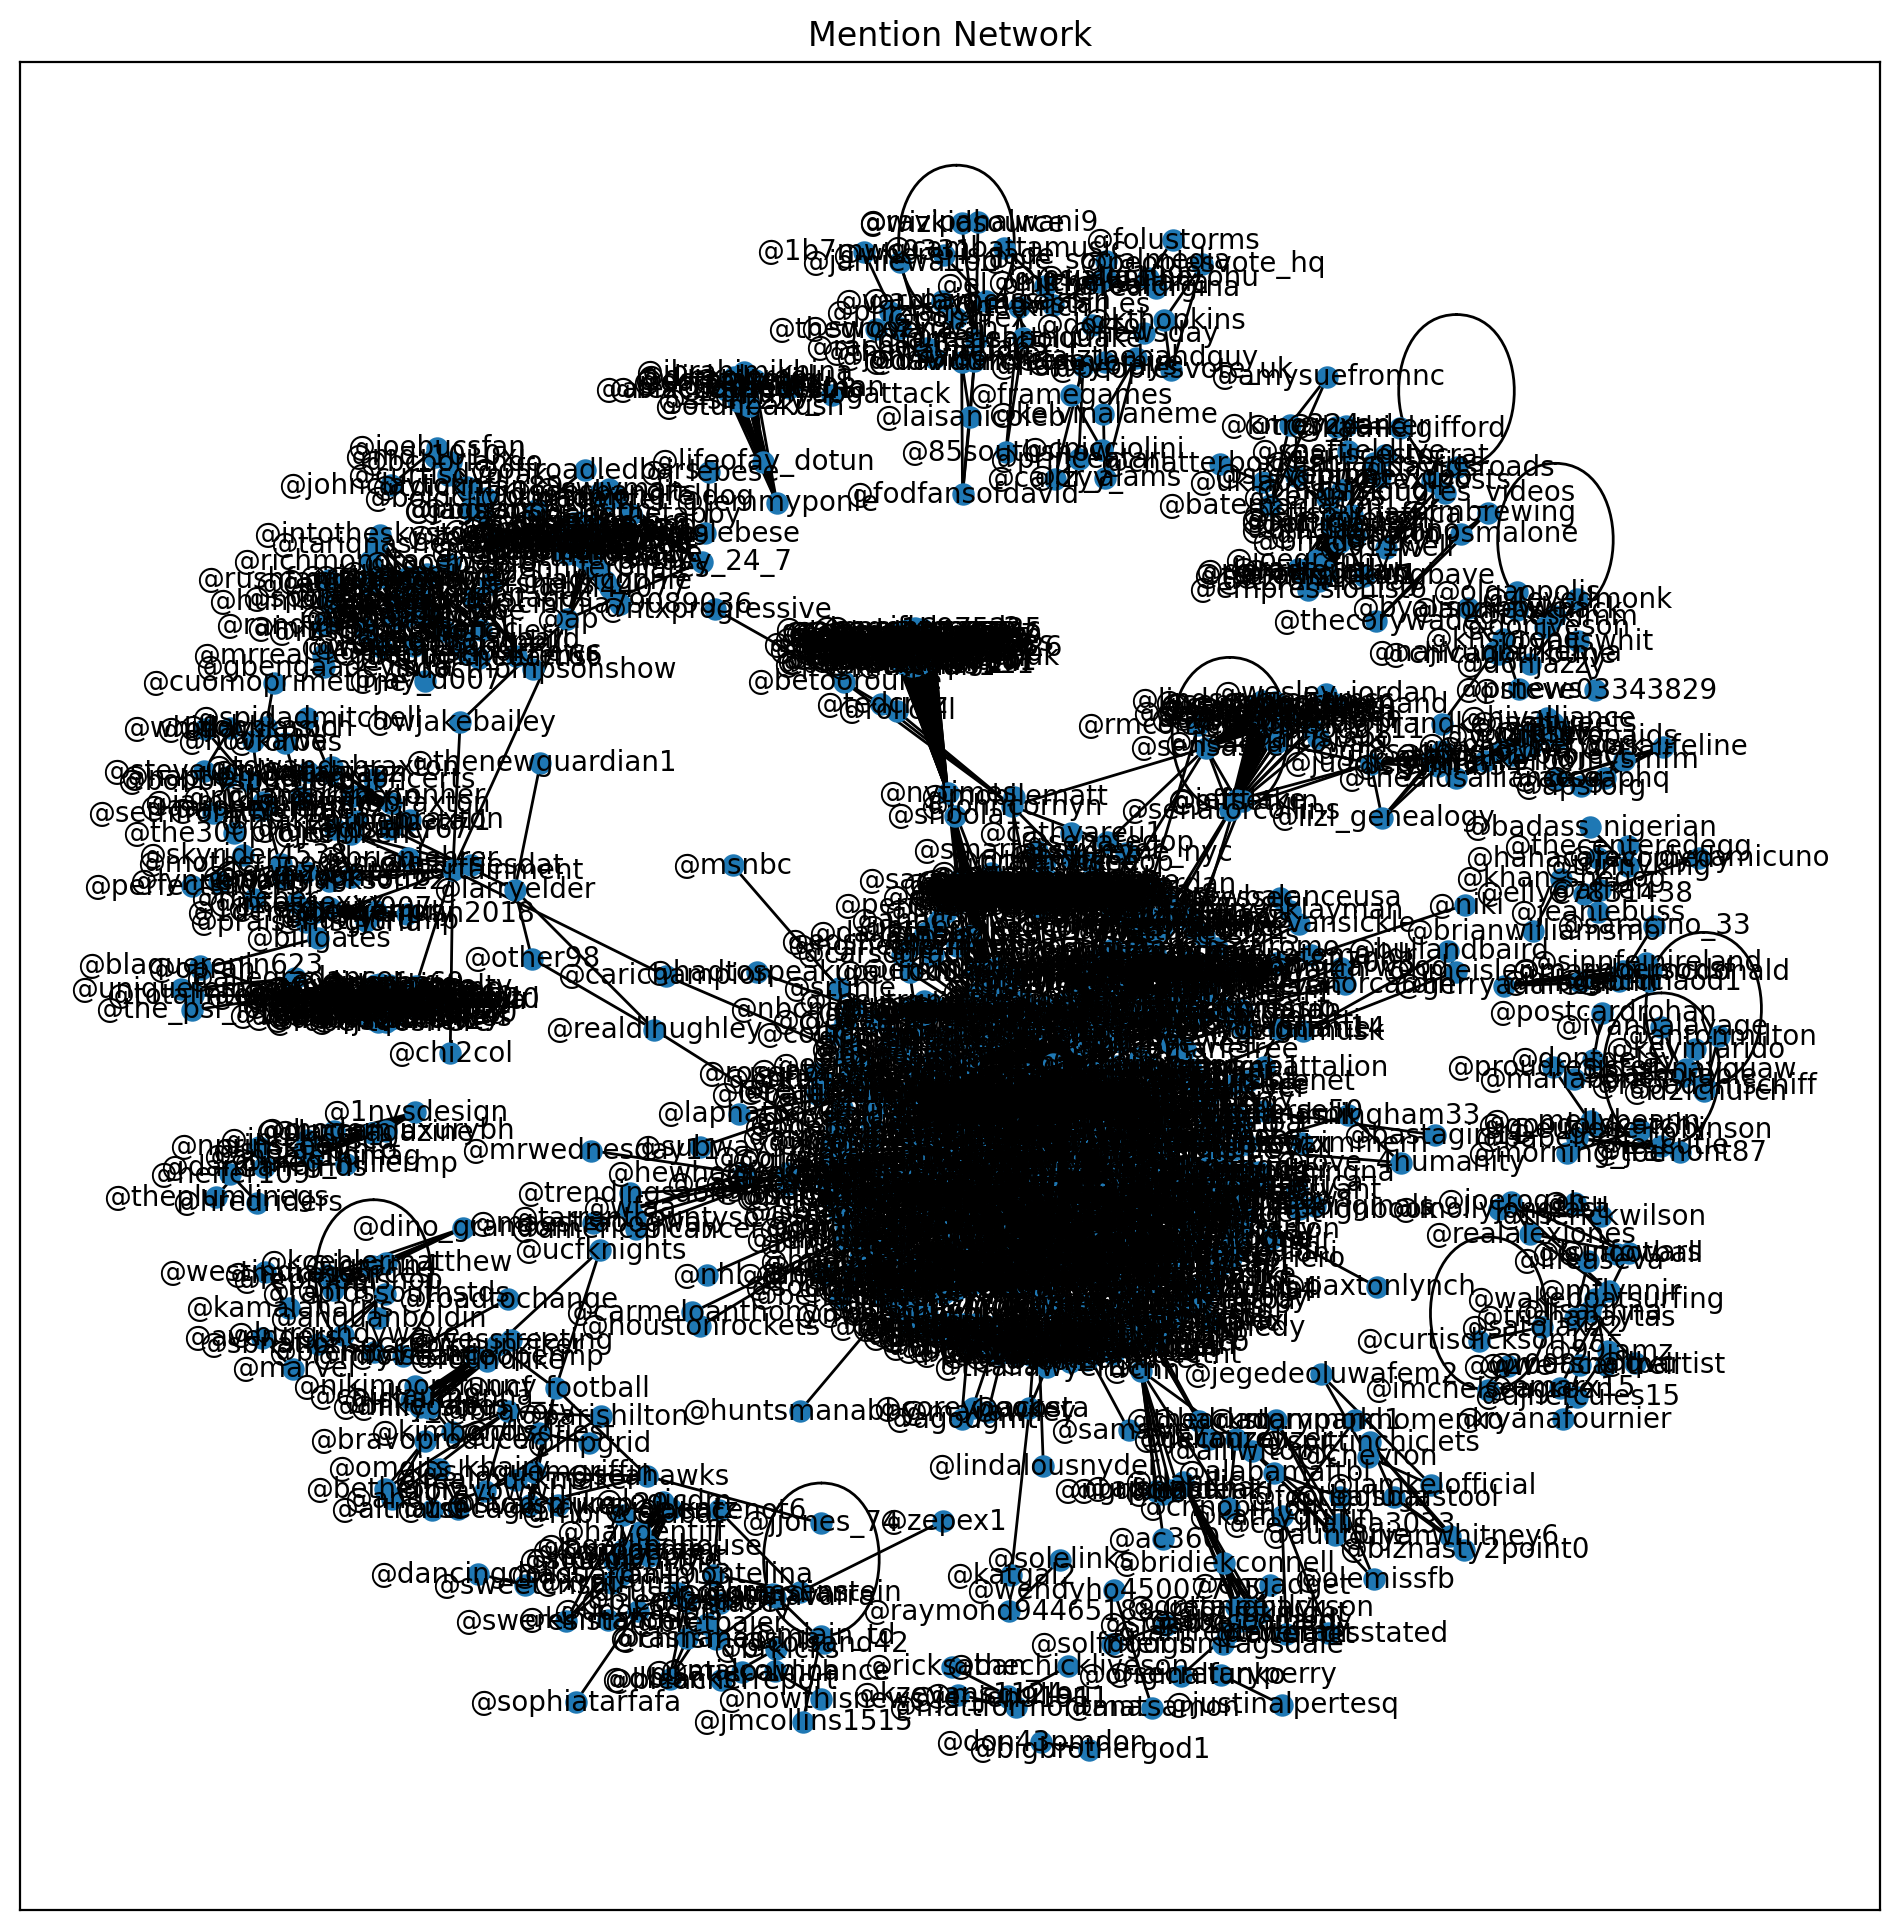

In [56]:
# Visualize Hashtag Network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_hashtags, k=0.1)
nx.draw_networkx(G_hashtags, pos, with_labels=True, node_size=50, font_size=10)
plt.title('Hashtag Network')
plt.show()

# Visualize Mention Network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_mentions, k=0.1)
nx.draw_networkx(G_mentions, pos, with_labels=True, node_size=50, font_size=10)
plt.title('Mention Network')
plt.show()


In [57]:
# Centrality measures for the hashtag network
hashtag_degree_centrality = nx.degree_centrality(G_hashtags)
hashtag_betweenness_centrality = nx.betweenness_centrality(G_hashtags)
hashtag_closeness_centrality = nx.closeness_centrality(G_hashtags)
hashtag_clustering_coefficient = nx.clustering(G_hashtags)

# Create a DataFrame for hashtag network features
hashtag_features = pd.DataFrame({
    'degree_centrality': hashtag_degree_centrality,
    'betweenness_centrality': hashtag_betweenness_centrality,
    'closeness_centrality': hashtag_closeness_centrality,
    'clustering_coefficient': hashtag_clustering_coefficient
})

# Centrality measures for the mention network
mention_degree_centrality = nx.degree_centrality(G_mentions)
mention_betweenness_centrality = nx.betweenness_centrality(G_mentions)
mention_closeness_centrality = nx.closeness_centrality(G_mentions)
mention_clustering_coefficient = nx.clustering(G_mentions)

# Create a DataFrame for mention network features
mention_features = pd.DataFrame({
    'degree_centrality': mention_degree_centrality,
    'betweenness_centrality': mention_betweenness_centrality,
    'closeness_centrality': mention_closeness_centrality,
    'clustering_coefficient': mention_clustering_coefficient
})


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming you have a labeled dataset with 'influential' as the target variable
# Create a combined dataset with features from both networks (if applicable)
combined_features = hashtag_features.join(mention_features, lsuffix='_hashtag', rsuffix='_mention', how='outer').fillna(0)

# Add the target variable (this should be your labels indicating influential users)
# For example purposes, let's create a random binary target variable
import numpy as np
combined_features['influential'] = np.random.randint(0, 2, combined_features.shape[0])

# Split the data into training and testing sets
X = combined_features.drop('influential', axis=1)
y = combined_features['influential']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.50      0.64      0.56       905
           1       0.48      0.35      0.41       874

    accuracy                           0.50      1779
   macro avg       0.49      0.49      0.48      1779
weighted avg       0.49      0.50      0.49      1779



                          feature  importance
3  clustering_coefficient_hashtag    0.260736
6    closeness_centrality_mention    0.202851
1  betweenness_centrality_hashtag    0.176066
0       degree_centrality_hashtag    0.117701
2    closeness_centrality_hashtag    0.110993
4       degree_centrality_mention    0.065395
5  betweenness_centrality_mention    0.039744
7  clustering_coefficient_mention    0.026515


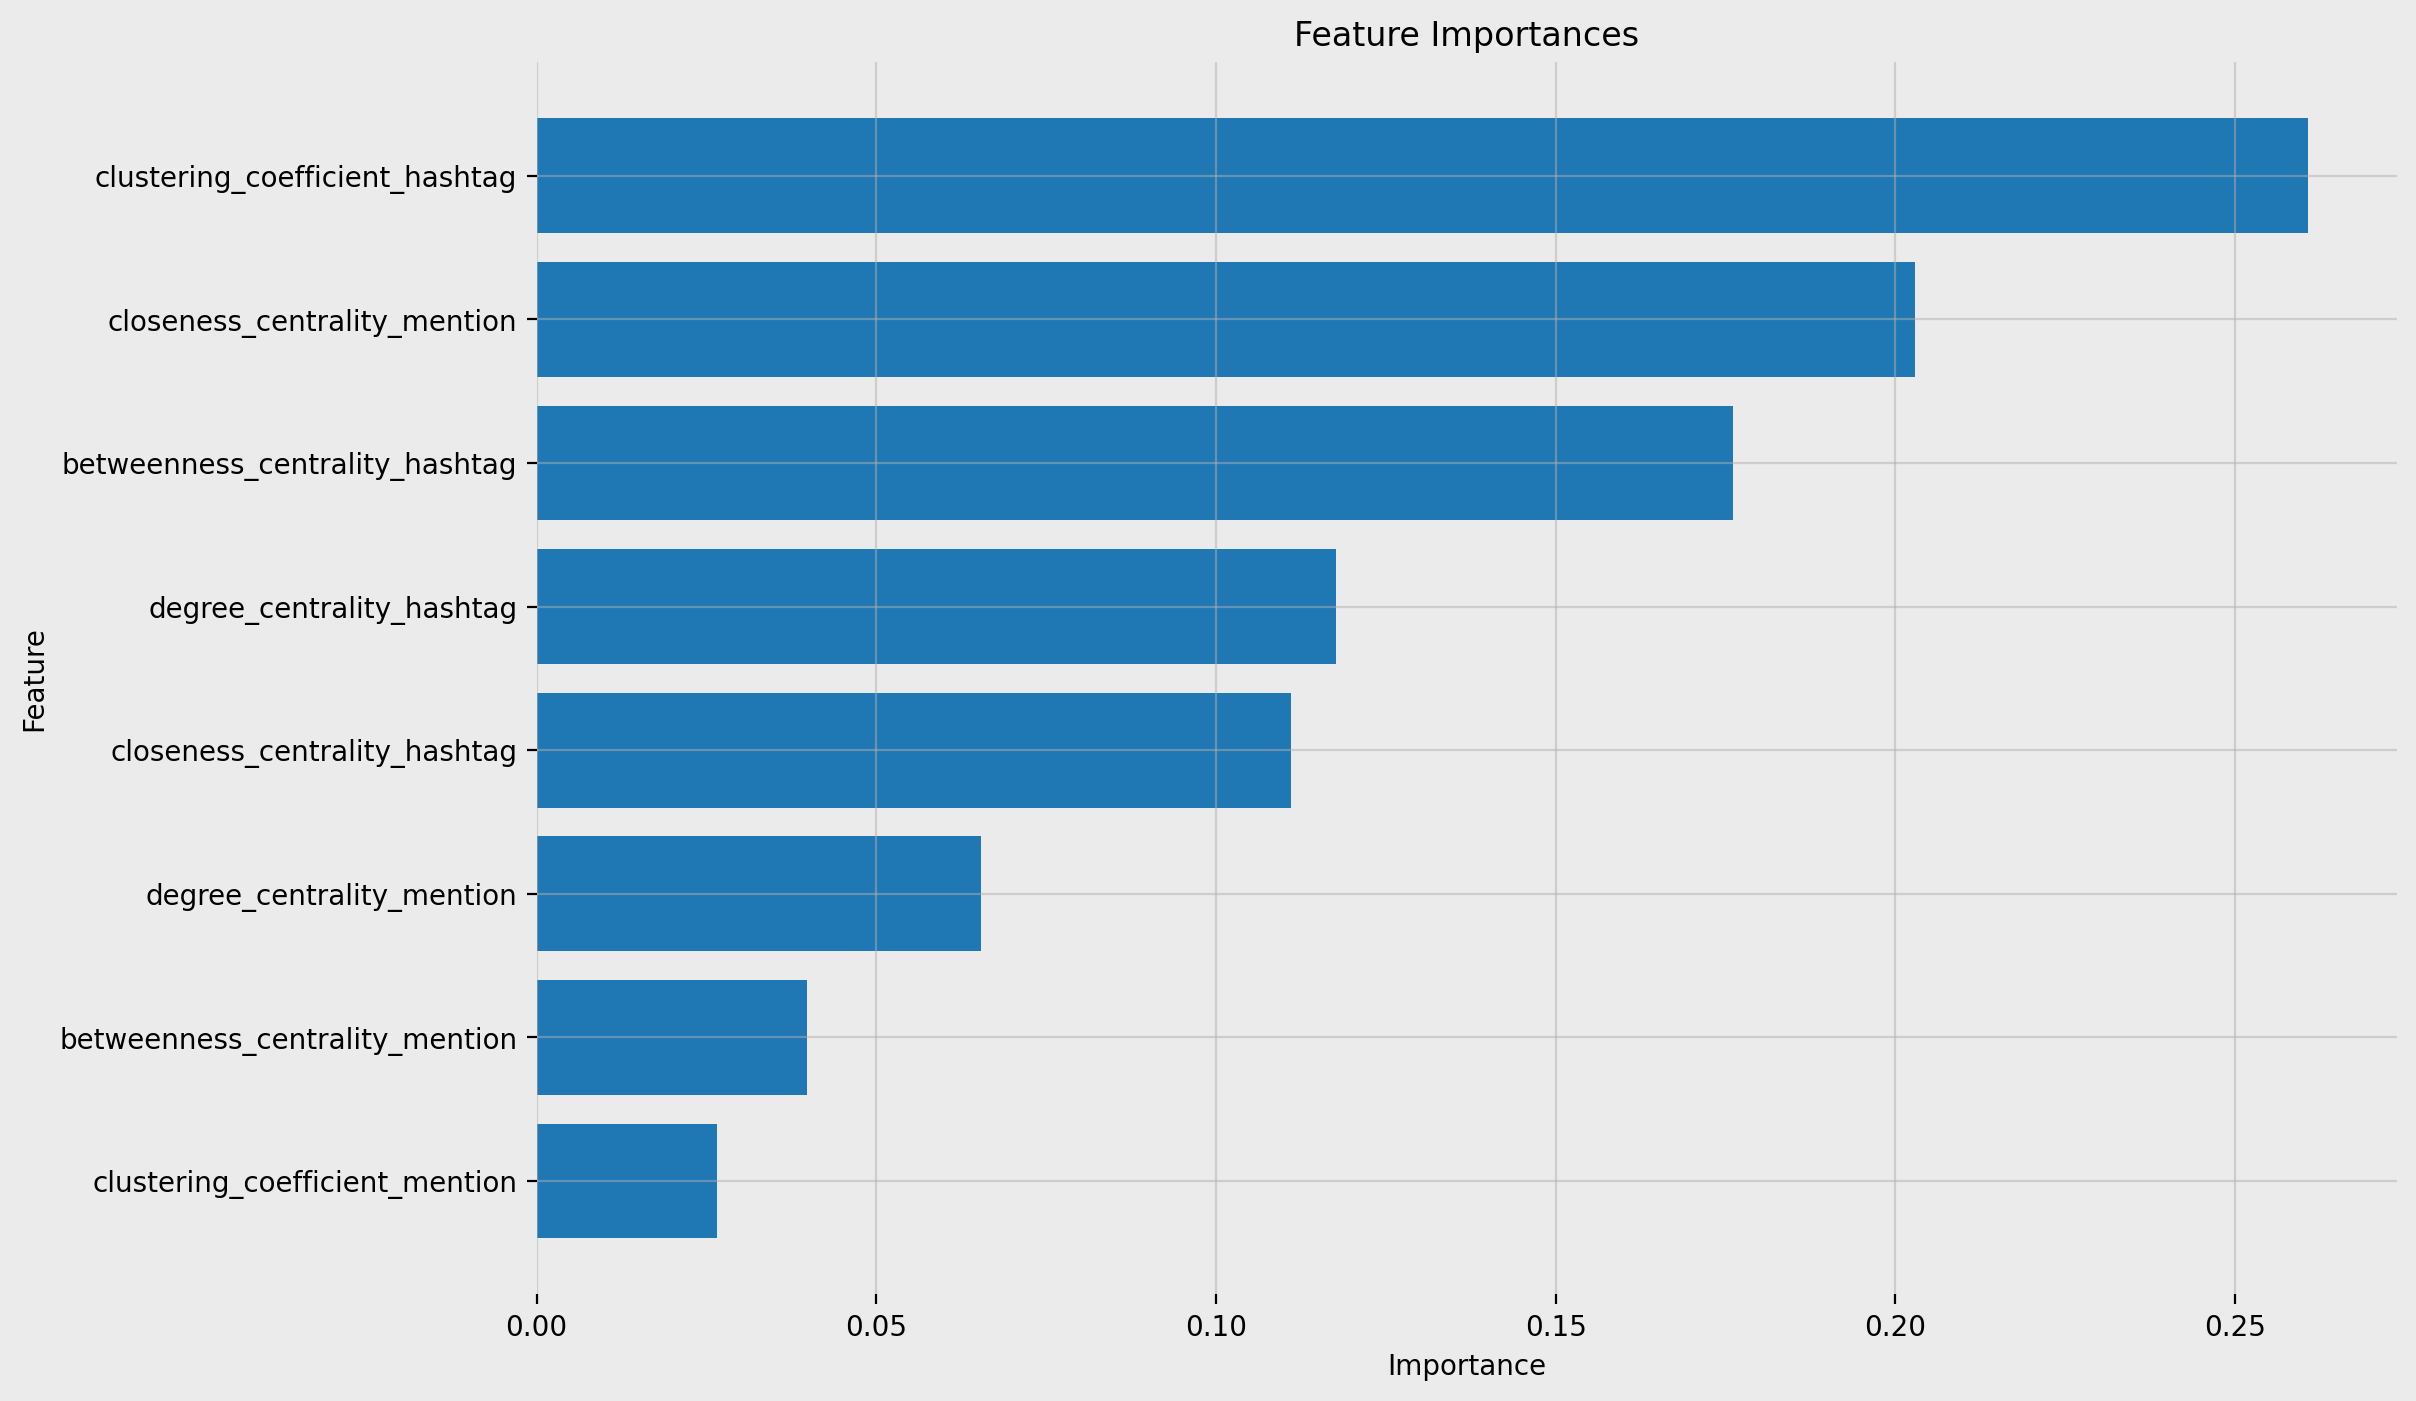

In [59]:
# Get feature importances from the Random Forest model
importances = clf.feature_importances_
feature_names = X.columns

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importances)

# Visualize feature importances
plt.figure(facecolor='#ebebeb', figsize=(12, 8))
plt.barh(feature_importances['feature'][::-1], feature_importances['importance'][::-1])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)
plt.show()


In [60]:
pip install python-louvain


In [61]:
import community as community_louvain
tweets = tweets_users_df[['tweet_id', 'tweet_full_text', 'tweet_entities']]


In [62]:
# Function to extract hashtags and mentions from tweet entities
def extract_entities(entities_str):
    hashtags = []
    mentions = []
    try:
        entities = eval(entities_str)
        if 'hashtags' in entities:
            hashtags = [tag['text'] for tag in entities['hashtags']]
        if 'user_mentions' in entities:
            mentions = [mention['screen_name'] for mention in entities['user_mentions']]
    except:
        pass
    return hashtags, mentions


In [63]:
for index, row in tweets.iterrows():
    tweet_id = row['tweet_id']
    hashtags, mentions = extract_entities(row['tweet_entities'])

    for hashtag in hashtags:
        G_hashtags.add_node(tweet_id)
        G_hashtags.add_node(hashtag)
        G_hashtags.add_edge(tweet_id, hashtag)

    for mention in mentions:
        G_mentions.add_node(tweet_id)
        G_mentions.add_node(mention)
        G_mentions.add_edge(tweet_id, mention)

In [64]:
import community.community_louvain as community_louvain

# Detect communities using Louvain method
hashtag_partition = community_louvain.best_partition(G_hashtags)
mention_partition = community_louvain.best_partition(G_mentions)

In [65]:
# Convert partition to community list format
def partition_to_communities(partition):
    communities = {}
    for node, comm_id in partition.items():
        if comm_id not in communities:
            communities[comm_id] = []
        communities[comm_id].append(node)
    return list(communities.values())

In [66]:
hashtag_communities = partition_to_communities(hashtag_partition)
mention_communities = partition_to_communities(mention_partition)


In [67]:
# Print communities
print("Hashtag Communities:", hashtag_communities)
print("Mention Communities:", mention_communities)

Hashtag Communities: [['#quote', '#motivation', '#goals', '#loveislove', '#showerthoughts', '#love_yourself', '#believeinyourself', '#equalityforall', '#compassionforall', '#marketing', '#ad', '#advertising', '#beyou', '#smile', '#custom', '#dream', '#crazy', '#brandnew', '#campaign', '#video', '#message', '#sports', '#brand', '#tv', '#advert', '#digital', '#sport', '#inspire', '#youcandoit', '#dreambig', '#effort', '#work', '#justdance', '#dancelife', '#dancepiration', '#inspiration', '#danceanyway', '#dance', '#balletlife', '#ballet', '#bunhead', '#jazzdance', '#tapdance', '#hiphopdance', '#danceimprov', '#dancemood', '#choreo', '#choreography', '#nolimits', '#nofear', '#fearless', '#dancemore', '#dancenow', '#nevergiveup', '#oreo', '#oreomilkshake', '#yummy', '#myws', '#winstonsalem', '#clemmons', '#bakedfromscratch', '#mompreneur', '#eat', '#futuregoals', '#howtomakethisyearawesome', '#criticalthink', '#reflection', '#business', '#agency', '#consultant', '#online', '#creative', '#t

In [68]:
nx.write_edgelist(G_hashtags, "hashtags_network.csv", delimiter=",")

In [69]:
nx.write_edgelist(G_mentions, "mentions_network.csv", delimiter=",")

In [70]:
from google.colab import files
files.download("hashtags_network.csv")
files.download("mentions_network.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>